In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.spatial import Delaunay, delaunay_plot_2d
from numpy.linalg import inv
import cv2

In [15]:
path =  "/Users/venkateshmunaga/Desktop/computer graphics/assignment5/1a.pts"
face1 = np.loadtxt(path, comments=("version:", "n_points:", "{", "}"))

path =  "/Users/venkateshmunaga/Desktop/computer graphics/assignment5/1b.pts"
face2 = np.loadtxt(path, comments=("version:", "n_points:", "{", "}"))

face1_img = cv2.imread("/Users/venkateshmunaga/Desktop/computer graphics/assignment5/1a.jpg")
face2_img = cv2.imread("/Users/venkateshmunaga/Desktop/computer graphics/assignment5/1b.jpg")

In [16]:
# mean_face = (0.5 * face1) + ((1 - 0.5) * face2)

In [17]:
all_faces_coordinage = []
for i in range(1, 201):
    path = "/Users/venkateshmunaga/Desktop/computer graphics/assignment3/frontalshapes_manuallyannotated_46points/"+str(i)+"a.pts"
    arr = np.loadtxt(path, comments=("version:", "n_points:", "{", "}"))
    all_faces_coordinage.append(arr)

In [18]:
mean= []

for j in range(46):
    X_mean =0
    Y_mean =0
    for i in range(len(all_faces_coordinage)):
        X_mean += float(all_faces_coordinage[i][j][0])
        Y_mean +=  float(all_faces_coordinage[i][j][1])
    X_mean /= 200
    Y_mean /= 200
    mean.append([X_mean, Y_mean])

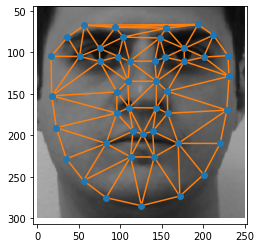

In [19]:
tri_meanface = Delaunay(mean)
_ = delaunay_plot_2d(tri_meanface)
plt.gca().invert_yaxis()
plt.imshow(face1_img)

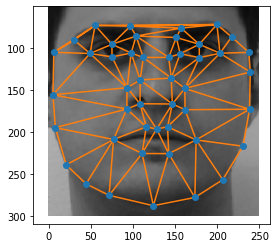

In [20]:
tri_face1 = Delaunay(face1)
_ = delaunay_plot_2d(tri_face1)
plt.gca().invert_yaxis()
plt.imshow(face1_img)

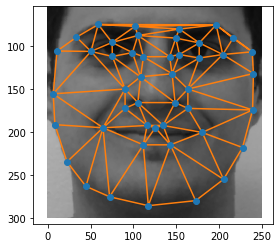

In [21]:
tri_face2 = Delaunay(face2)
_ = delaunay_plot_2d(tri_face2)
plt.gca().invert_yaxis()
plt.imshow(face2_img)

In [22]:
tri_face1.simplices = tri_meanface.simplices
tri_face2.simplices = tri_meanface.simplices

In [23]:
def affine_transformation(a, b):
    homo_matrix = np.array([
        [a[0][0], a[0][1], 1, 0, 0, 0],
        [a[1][0], a[1][1], 1, 0, 0, 0],
        [a[2][0], a[2][1], 1, 0, 0, 0],
        [0, 0, 0, a[0][0], a[0][1], 1],
        [0, 0, 0, a[1][0], a[1][1], 1],
        [0, 0, 0, a[2][0], a[2][1], 1]
       ])
    b = np.array(
        [b[0][0],
         b[1][0],
         b[2][0],
         b[0][1],
         b[1][1],
         b[2][1]
        ])
    homo_inv = inv(homo_matrix)
    a = np.dot(homo_inv, b)
    a = a.reshape(2, 3)
    a = np.append(a, [[0, 0,1]], axis=0)
    a_inv = inv(a)
    return a_inv

In [24]:
def isWithinBoundaries(x, y, points):
    
    x1, y1 = points[0]
    x2, y2 = points[1]
    x3, y3 = points[2]
    
    a = ((y2 - y3) * (x - x3) + (x3 - x2) * (y - y3)) / (
        (y2 - y3) * (x1 - x3) + (x3 - x2) * (y1 - y3)
    )
    b = ((y3 - y1) * (x - x3) + (x1 - x3) * (y - y3)) / (
        (y2 - y3) * (x1 - x3) + (x3 - x2) * (y1 - y3)
    )
    c = 1.0 - a - b
    epsilon = 1e-10  # tollerance in case the point lies on triangle's  edge
    aCondition = a + epsilon >= 0.0 and a - epsilon <= 1.0
    bCondition = b + epsilon >= 0.0 and b - epsilon <= 1.0
    cCondition = c + epsilon >= 0.0 and c - epsilon <= 1.0
    return aCondition and bCondition and cCondition

In [36]:
def morphing():
    img1 = face1_img
    img2 = face2_img

    for a in np.linspace(0, 1, 30):
        
        new_img = np.zeros(img1.shape, dtype=img1.dtype)
        print(f"alpha: {a}")
        print("morph image: ")
        
        if(a == 0.0):
            for simplice in tri_meanface.simplices:
                tri1_points = tri_face1.points[simplice]
                tri2_points = tri_face2.points[simplice]
                tri_mean_points = tri_meanface.points[simplice]
            
                tri1_inv = affine_transformation(tri_mean_points, tri1_points)
                tri2_inv = affine_transformation(tri_mean_points, tri2_points)
            
                for i in range(0, img1.shape[0]+1):
                    for j in range(0, img1.shape[1]+1):
                        coor1 = np.dot(tri1_inv, [i, j, 1])
                        coor2 = np.dot(tri2_inv, [i,j, 1])
                        x1 = coor1[0]
                        y1 = coor1[1]
                        x2 = coor2[0]
                        y2 = coor2[1]
                    
                        if(isWithinBoundaries(x1, y1, tri2_points) or isWithinBoundaries(x2, y2, tri1_points)):
                            new_img[j, i] = (a * img1[int(y1)][int(x1)]) + ((1 - a) * img2[int(y2)][int(x2)])
                        
                plt.imshow(new_img)
                plt.show()
            plt.imshow(new_img)
            plt.show()
        else:
            for simplice in tri_meanface.simplices:
                tri1_points = tri_face1.points[simplice]
                tri2_points = tri_face2.points[simplice]
                tri_mean_points = tri_meanface.points[simplice]
            
                tri1_inv = affine_transformation(tri_mean_points, tri1_points)
                tri2_inv = affine_transformation(tri_mean_points, tri2_points)
            
                for i in range(0, img1.shape[0]+1):
                    for j in range(0, img1.shape[1]+1):
                        coor1 = np.dot(tri1_inv, [i, j, 1])
                        coor2 = np.dot(tri2_inv, [i,j, 1])
                        x1 = coor1[0]
                        y1 = coor1[1]
                        x2 = coor2[0]
                        y2 = coor2[1]
                    
                        if(isWithinBoundaries(x1, y1, tri2_points) or isWithinBoundaries(x2, y2, tri1_points)):
                            new_img[j, i] = (a * img1[int(y1)][int(x1)]) + ((1 - a) * img2[int(y2)][int(x2)])
            
            plt.imshow(new_img)
            plt.show()
        

alpha: 0.0
morph image: 


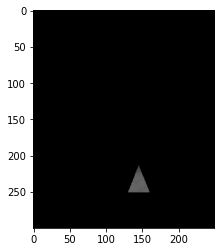

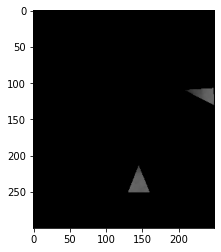

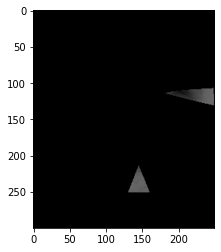

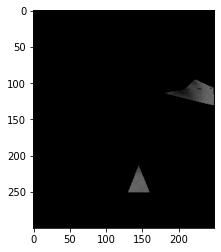

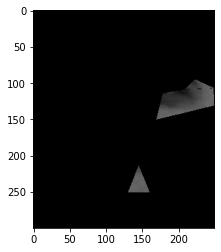

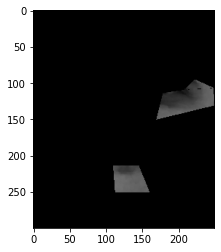

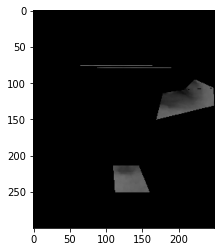

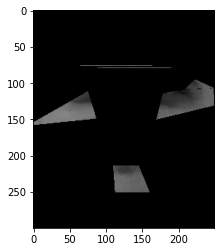

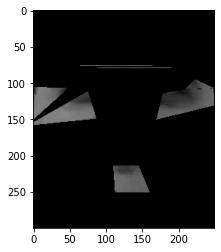

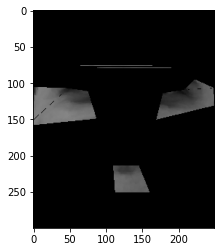

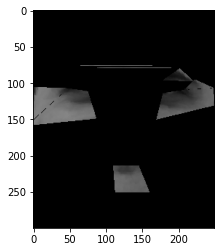

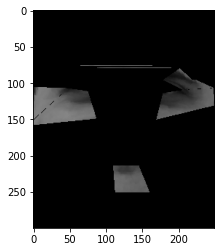

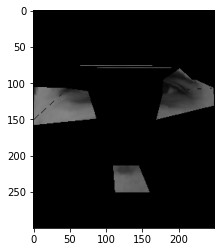

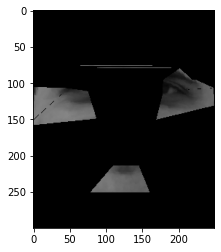

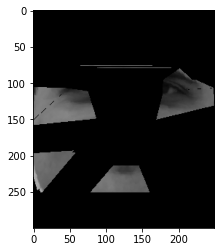

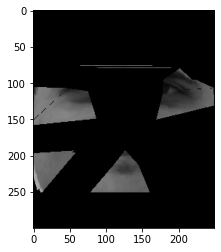

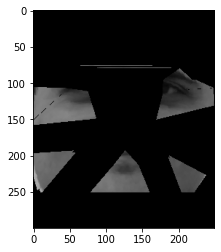

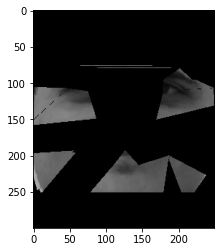

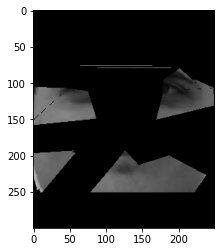

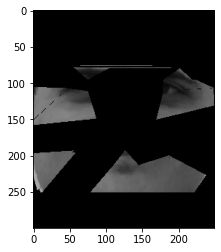

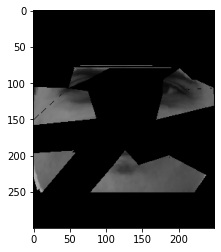

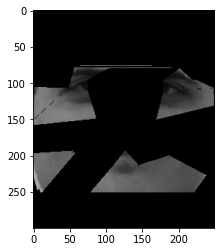

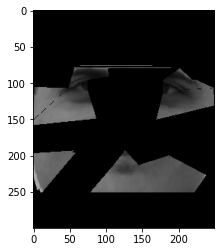

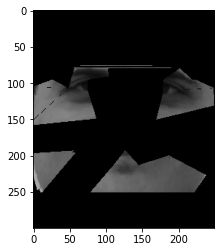

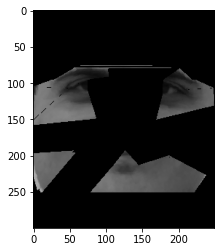

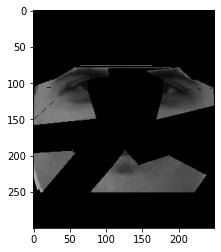

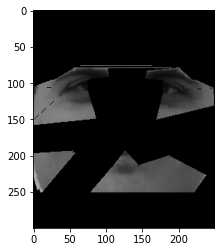

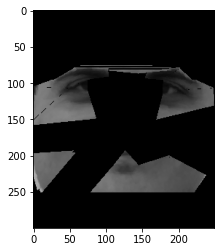

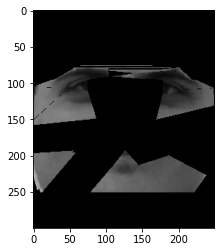

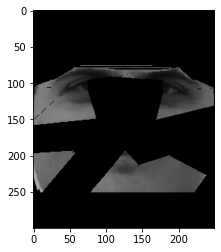

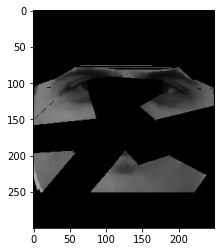

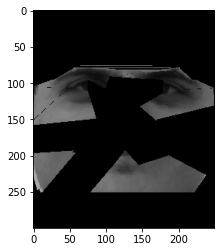

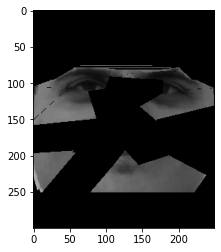

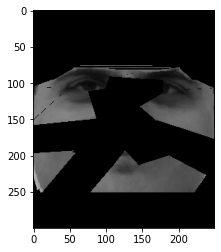

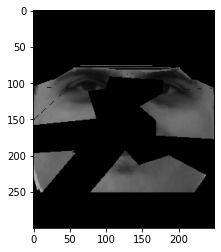

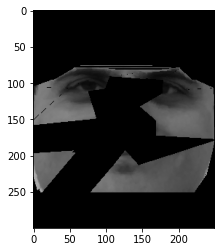

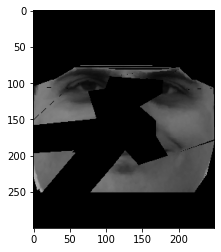

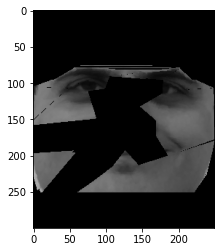

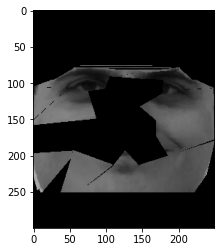

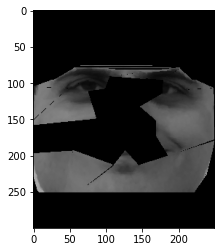

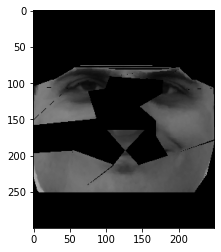

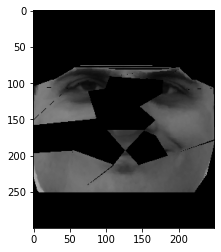

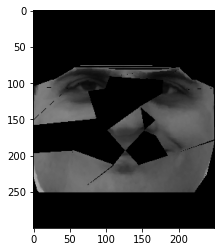

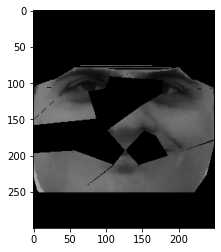

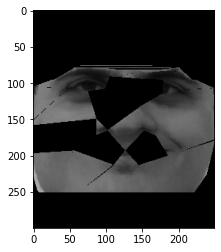

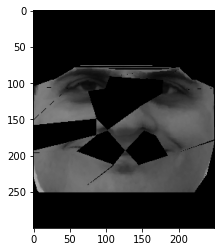

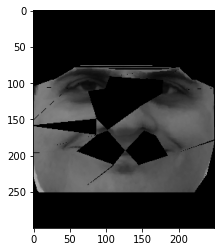

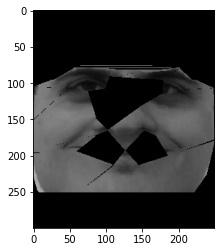

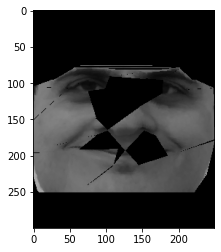

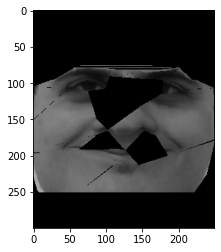

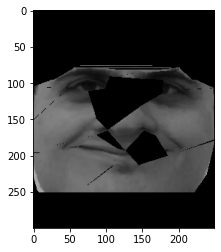

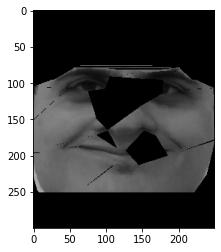

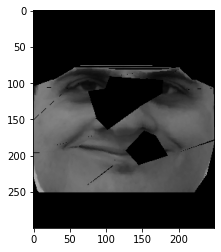

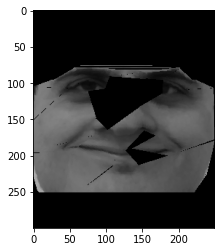

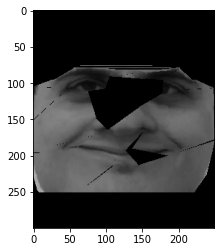

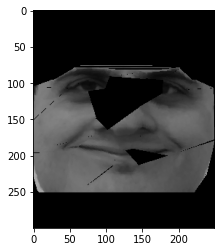

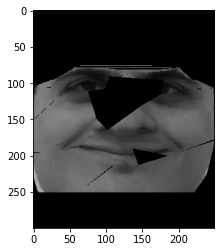

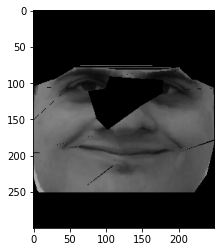

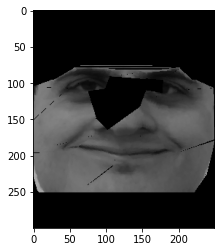

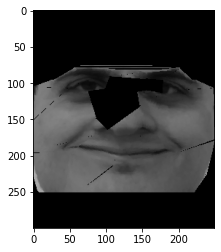

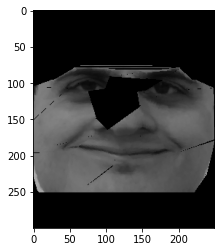

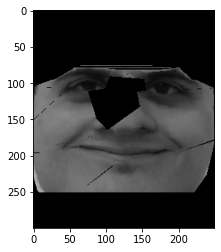

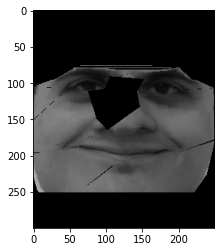

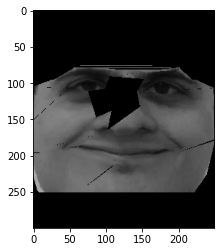

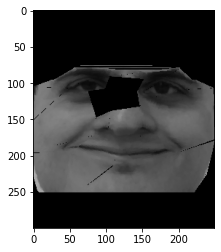

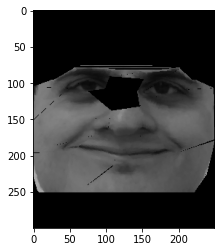

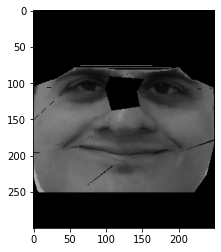

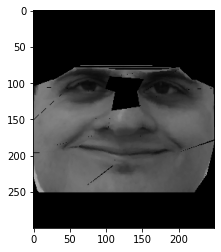

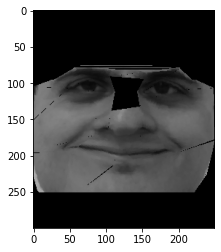

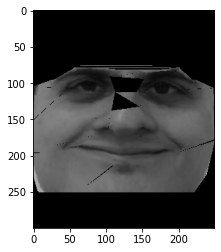

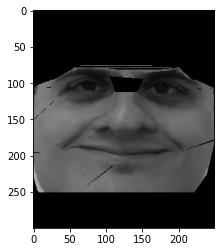

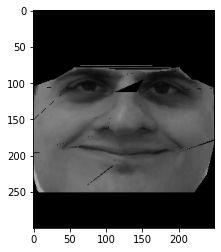

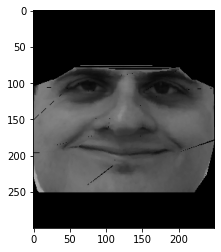

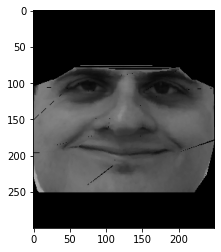

alpha: 0.034482758620689655
morph image: 


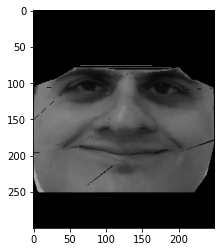

alpha: 0.06896551724137931
morph image: 


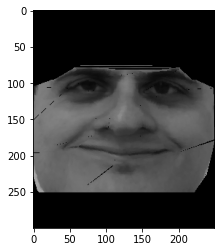

alpha: 0.10344827586206896
morph image: 


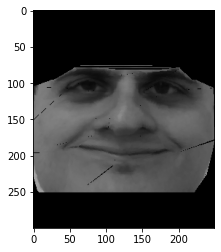

alpha: 0.13793103448275862
morph image: 


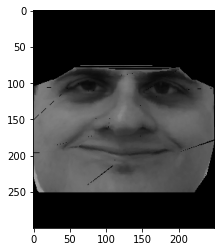

alpha: 0.1724137931034483
morph image: 


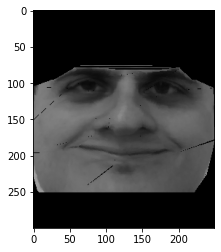

alpha: 0.20689655172413793
morph image: 


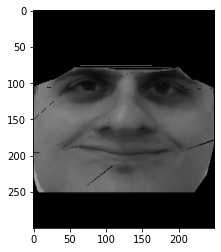

alpha: 0.24137931034482757
morph image: 


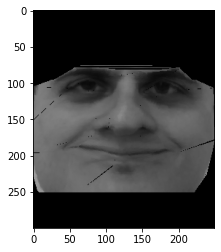

alpha: 0.27586206896551724
morph image: 


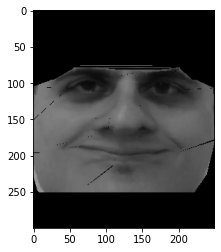

alpha: 0.3103448275862069
morph image: 


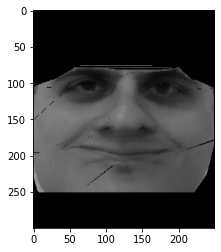

alpha: 0.3448275862068966
morph image: 


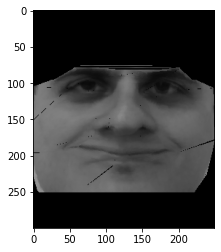

alpha: 0.3793103448275862
morph image: 


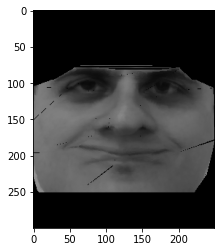

alpha: 0.41379310344827586
morph image: 


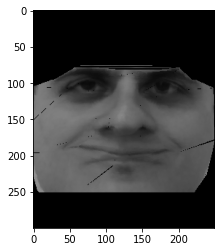

alpha: 0.4482758620689655
morph image: 


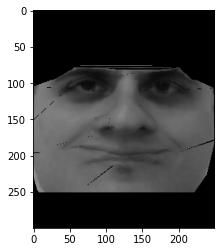

alpha: 0.48275862068965514
morph image: 


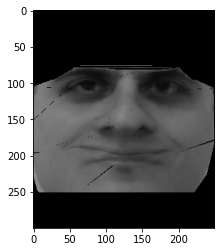

alpha: 0.5172413793103449
morph image: 


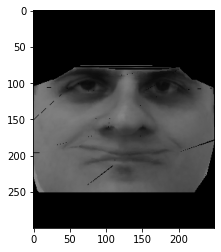

alpha: 0.5517241379310345
morph image: 


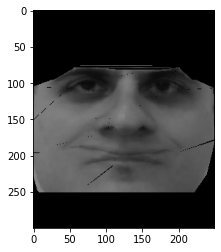

alpha: 0.5862068965517241
morph image: 


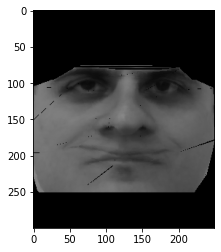

alpha: 0.6206896551724138
morph image: 


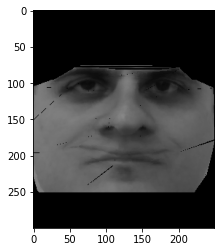

alpha: 0.6551724137931034
morph image: 


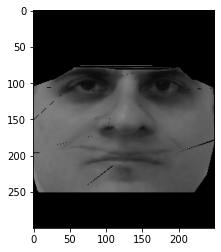

alpha: 0.6896551724137931
morph image: 


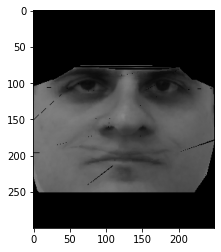

alpha: 0.7241379310344828
morph image: 


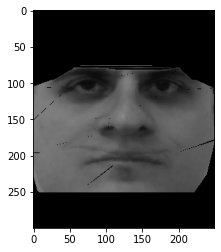

alpha: 0.7586206896551724
morph image: 


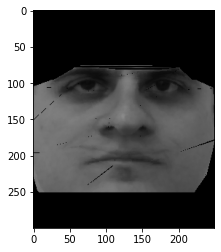

alpha: 0.7931034482758621
morph image: 


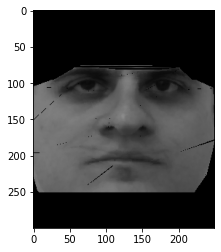

alpha: 0.8275862068965517
morph image: 


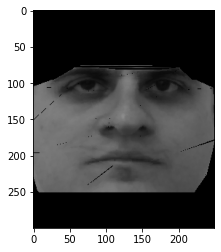

alpha: 0.8620689655172413
morph image: 


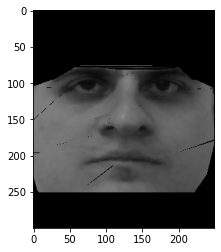

alpha: 0.896551724137931
morph image: 


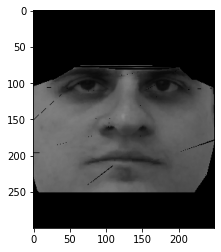

alpha: 0.9310344827586207
morph image: 


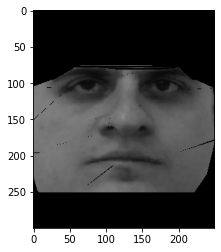

alpha: 0.9655172413793103
morph image: 


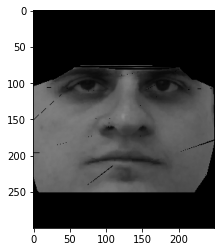

alpha: 1.0
morph image: 


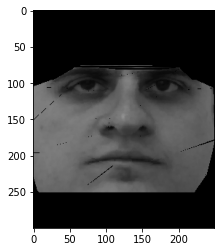

In [37]:
morphing()